In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_model_linlog import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.full.myfun_density import *
from ipynb.fs.full.myfun_model_usefulfuns import *

2024-03-06 22:36:30.080528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 22:36:30.080563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 22:36:30.081568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 22:36:30.088080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 22:36:30.821044: W tensorflow/compiler/tf2

# Preliminary: load NN model

In [2]:
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

target_dir = "./out/"
namefile_model_nn = "/model_nn10.keras"

In [3]:
# Load NN10 model
dir_nn = dir_nn10
# dir_nn = dir_nn10_v2

path = target_dir + dir_nn
model_nn = keras.models.load_model(path + namefile_model_nn)

# preliminary

In [4]:
flag_save = True

In [5]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_density_misc_part2")
    
    path = 'out/' + d
    os.mkdir(path)

# 1. Velocity vs distances and densities

## Preliminary

In [6]:
# space
N = 100
xspan1 = np.linspace(0.01,1,N) # consecutive distances

# time
Nt = 201
T = .5
tspan1 = np.linspace(0,T,Nt)
dt = T/len(tspan1)

it = -1

## Lin model

In [7]:
# Model params
L_lin = .0025
v0 = 1

# Solving the ODE
sol_lin1 = odeint(TD_LWR_model, xspan1, tspan1, args=(N, v0, L_lin, 'Lin'), tfirst = True).T

In [8]:
# consecutive distances
xx_lin = np.diff(sol_lin1[:,it],axis=0)

# velocities
dx_sol_lin = []
for car_traj in sol_lin1:
    dx_ct = np.diff(car_traj, axis=0)
    dx_sol_lin.append(dx_ct)

vv_lin = [dx[it]/dt for dx in dx_sol_lin][:-1]

# densities
# dd_lin = 1/xx_lin

In [9]:
## rinormalizzazione
xx_lin = xx_lin/np.max(xx_lin)
vv_lin = vv_lin/np.max(vv_lin)
dd_lin = 1/xx_lin

## NN10 model

In [10]:
# ODE computation
t_list, sol_ann_list, v_list = nn_odesolver(model_nn, N, xspan1, tspan1)

In [11]:
# consecutive distances
xx_nn = np.diff(sol_ann_list[:,it],axis=0)

# velocities
## 1. postprocessed
dx_sol_ann = []
for car_traj in sol_ann_list:
    dx_ct = np.diff(car_traj, axis=0)
    dx_sol_ann.append(dx_ct)
vv_nn1 = [dx[it]/dt for dx in dx_sol_ann][:-1]

## 2. preprocessed
vv_nn2 = v_list[:,it][:-1]

vv_nn = vv_nn2

# densities
# dd_nn = 1/xx_nn

In [12]:
## rinormalizzazione
xx_nn = xx_lin/np.max(xx_nn)
vv_nn = vv_lin/np.max(vv_nn)
dd_nn = 1/xx_nn

## Plot

In [13]:
path

'out/2024-03-06_22-36-32_density_misc_part2'

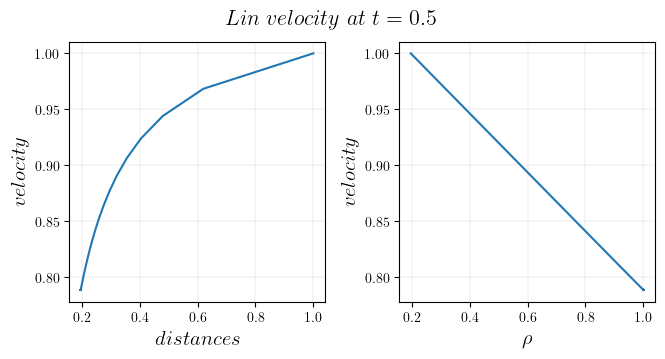

In [14]:
# Initialize the fig
nrow, ncol = 1, 2
width, height = 4.5, 4.5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# AX 0
ax[0].plot(xx_lin, vv_lin)

ax[0].grid(color='grey', linestyle='-', linewidth=0.1)
# ax[0].set_title(fr"$NN10\ velocity$", fontsize=18)
ax[0].set_xlabel(fr"$distances$", fontsize=15)
ax[0].set_ylabel(fr"$velocity$", fontsize=15)

# AX 1
dd_lin2 = dd_lin/np.max(dd_lin)

ax[1].plot(dd_lin2, vv_lin)

ax[1].grid(color='grey', linestyle='-', linewidth=0.1)
# ax[1].set_title(fr"$NN10\ velocity$", fontsize=18)
ax[1].set_xlabel(fr"$\rho$", fontsize=15)
ax[1].set_ylabel(fr"$velocity$", fontsize=15)

fig.tight_layout()
plt.suptitle(fr"$Lin\ velocity\ at\ t={tspan1[it]}$", fontsize=16,y=1.05);
plt.show()

# Save figure
if flag_save:

    title = f"/velocity+flux_lin"     
    fig.savefig(path+title+ext, bbox_inches='tight')

## NN

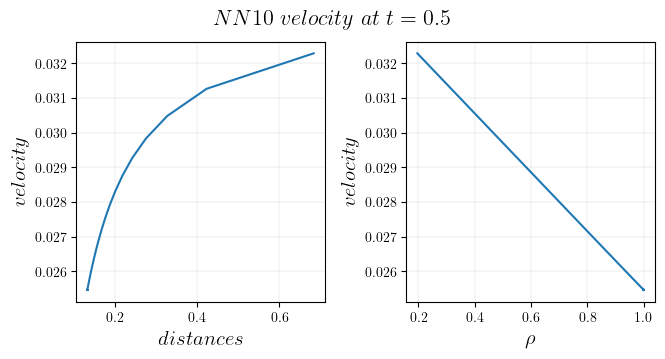

In [15]:

# Initialize the fig
nrow, ncol = 1, 2
width, height = 4.5, 4.5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# AX 0
ax[0].plot(xx_nn, vv_nn)

ax[0].grid(color='grey', linestyle='-', linewidth=0.1)
# ax[0].set_title(fr"$NN10\ velocity$", fontsize=18)
ax[0].set_xlabel(fr"$distances$", fontsize=15)
ax[0].set_ylabel(fr"$velocity$", fontsize=15)

# AX 1
dd_nn2 = dd_nn/np.max(dd_nn)
ax[1].plot(dd_nn2, vv_nn)

ax[1].grid(color='grey', linestyle='-', linewidth=0.1)
# ax[1].set_title(fr"$NN10\ velocity$", fontsize=18)
ax[1].set_xlabel(fr"$\rho$", fontsize=15)
ax[1].set_ylabel(fr"$velocity$", fontsize=15)

fig.tight_layout()
plt.suptitle(fr"$NN10\ velocity\ at\ t={tspan1[it]}$", fontsize=16,y=1.05);
plt.show()

# Save figure
if flag_save:

    title = f"/velocity+flux_nn"     
    fig.savefig(path+title+ext, bbox_inches='tight')

# 2. Riemann problem

Since velocities predicted by NN are too large...

## Preliminary

In [16]:
## Params
Nx = 400
Nt = 201
T = .5

In [17]:
# Space - linearly distributed
dx = 1/int(Nx/3)
a = np.linspace(-1,0,int(Nx/3))
b = np.linspace(0+dx/2, 1, Nx-int(Nx/3))
xspan2 = np.concatenate([a, b])

# Time
tspan = np.linspace(0,T,Nt)
tspan_rounded = list(np.round(tspan,2))

## Lin simulation

In [18]:
# Model params
L_lin = .0025
v0 = 1

# Solving the ODE
sol_lin2 = odeint(TD_LWR_model, xspan2, tspan, args=(Nx, v0, L_lin, 'Lin'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis_lin = ln/np.diff(sol_lin2, axis=0)

## NN10 simulation

In [19]:
# ODE computation
normalize_flag = True
t_list2, sol_ann_list2, v_list2 = nn_odesolver(model_nn, Nx, xspan2, tspan, normalize_flag)

## Discretized density reconstruction
ln = 1/Nx
rho_dis_ann = ln/np.diff(sol_ann_list2, axis=0)

## Plot

In [20]:
# Plot params
exact_flag = False
fix_flag = True

idx = 0, int(len(tspan)*.5), -1

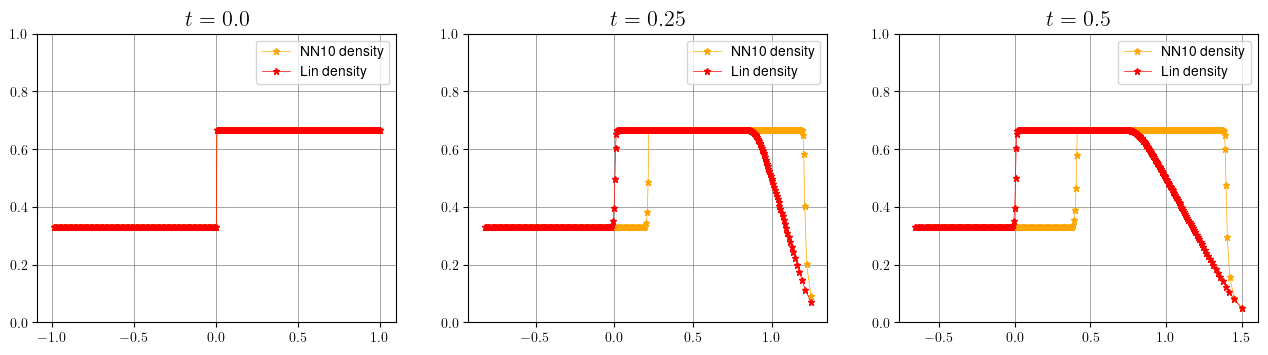

In [25]:
# Initialize the fig
nrow, ncol = 1, 3
width, height = 7, 5 # single subplot
fig, axes = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

# fig.suptitle(fr"$Discretized\ density$", fontsize=20, y = 1.05); # Figure titles

for ax, i in zip(axes, idx):
    
    t = tspan[i]
    
#     # exact density
#     if exact_flag:
#         idx_t, (cp_t, d_t), _, _ = rho_2s(xlims, Ndens, tspan, rho_l, rho_r, rho_out, flux, np.round(t,8), drho)
#         ax.plot(cp_t, d_t, c='g', ls = '-', lw = .5, marker='*', label="Exact density")
        
    # NN10 model
    x_nn = sol_ann_list2[:,i][1:]
    rho_nn = rho_dis_ann[:,i]    
    ax.plot(x_nn, rho_nn, c='orange', ls='-', lw = 0.5, ms=5, marker='*', label="NN10 density")
#     ax.plot(x_nn,x_nn*0,c='blue', ls='', ms=5, marker='o', label="Particles")

    # Linear model
    x_lin = sol_lin2[:,i][1:]
    rho_lin = rho_dis_lin[:,i]
    ax.plot(x_lin, rho_lin ,c='r', ls='-', lw = 0.5, ms=5, marker='*', label="Lin density")
#     ax.plot(x_lin,x_lin*0,c='blue', ls='', ms=5, marker='o', label="Particles")

#     ax.set_xlim([-1.25,1.75])
    ax.set_ylim([0, 1])
    ax.set_title(fr"$t={t.round(2)}$",fontsize=16)

    ax.grid(color='grey', linestyle='-', linewidth=0.5)
    ax.legend()

plt.show()

# Save figure
if flag_save:

    title = f"/nnvslin"     
    fig.savefig(path+title+ext, bbox_inches='tight')